In [9]:
import numpy as np
from spec_id import Gen_sim, Scale_model
from scipy.interpolate import interp1d, interp2d
from astropy.cosmology import Planck13 as cosmo
from astropy.io import ascii
from astropy.table import Table
import rpy2
import rpy2.robjects as robjects
R = robjects.r
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in", "ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

%matplotlib inline


In [25]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
Age=np.arange(.15,6.05,.05)

tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
ultau=np.append(0.0,10**(np.array(tau[1:])-9))
M,A=np.meshgrid(metal,age)
lwa_grid = np.load('../data/light_weight_scaling_3.npy')
col_list = sea.mpl_palette('terrain',ultau[1:].size)


In [26]:
def SFH(AGE,TAU):
    return AGE*np.exp(-AGE/TAU)


def t_avg(tau):   
    iage = np.arange(0,6.01,.01)

    hiressfh=SFH(iage,tau)
    
    top = np.zeros(len(iage)-1)
    bottom = np.zeros(len(iage)-1)
    
    for i in range(len(iage)-1):
        top[i] = np.trapz(hiressfh[0:i+1] * (iage[i+1] - iage[0:i+1]),iage[0:i+1])
        bottom[i] = np.trapz(hiressfh[0:i+1],iage[0:i+1])
    
    return   interp1d(np.arange(0.01,6.01,.01),top/bottom)(age)


In [12]:
print lwa_grid[17][20][3]

ldist =np.zeros([len(tau),age.size])

for i in range(len(tau)):
    l_dummy =np.zeros(age.size)
    for ii in range(age.size):
        l_dummy[ii] = lwa_grid[17][ii][i]
    ldist[i] = l_dummy


1.86757922067


In [14]:
ldist[1]

array([ 0.31660446,  0.40712244,  0.50188422,  0.59914083,  0.69776528,
        0.79709937,  0.896786  ,  0.99664187,  1.09657684,  1.19654795,
        1.2965353 ,  1.39652982,  1.49652747,  1.59652647,  1.69652605,
        1.79652587,  1.8965258 ,  1.99652577,  2.09652575,  2.19652575,
        2.29652575,  2.39652575,  2.49652575,  2.59652575,  2.69652575,
        2.79652575,  2.89652575,  2.99652575,  3.09652575,  3.19652575,
        3.29652575,  3.39652575,  3.49652575,  3.59652575,  3.69652575,
        3.79652575,  3.89652575,  3.99652575,  4.09652575,  4.19652575,
        4.29652575,  4.39652575,  4.49652575,  4.59652575,  4.69652575,
        4.79652575,  4.89652575,  4.99652575,  5.09652575,  5.19652575,
        5.29652575,  5.39652575,  5.49652575,  5.59652575,  5.69652575,
        5.79652575])

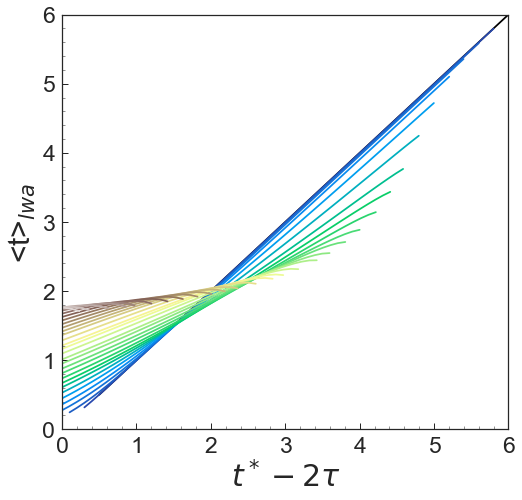

In [24]:
plt.figure(figsize=[8,8])

plt.plot(age,age,color='k')

for i in range(len(ldist)-1):
    plt.plot(age-2*ultau[i+1],ldist[i+1],color=col_list[i])
    
  
plt.legend(loc=1,fontsize=23)
# plt.axis([.5,6,0,7.2])
plt.xlabel('$t^* - 2 \\tau$',fontsize=30)
plt.ylabel('<t>$_{lwa}$',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.minorticks_on()
plt.ylim(0,6)
plt.xlim(0,6)



/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in divide


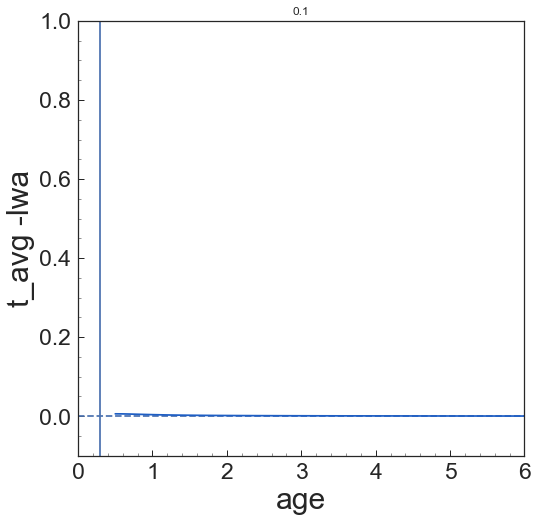

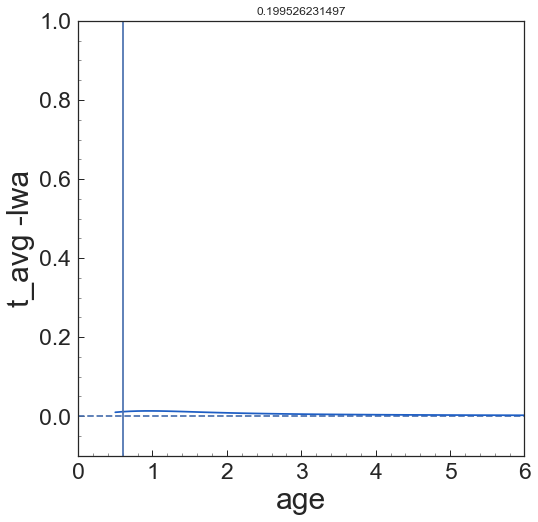

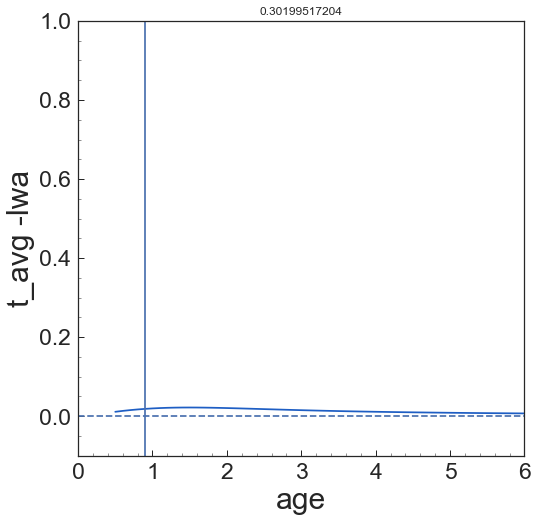

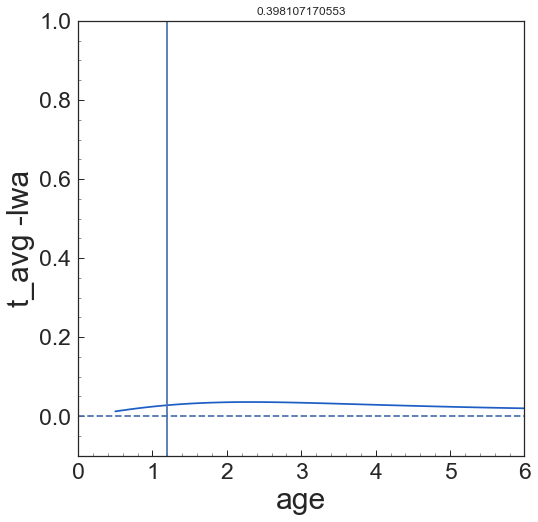

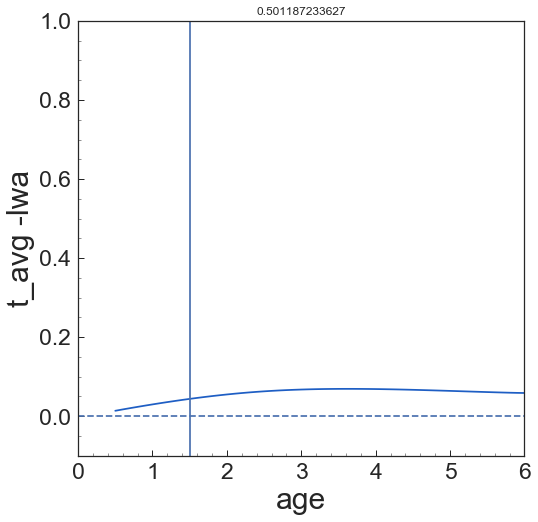

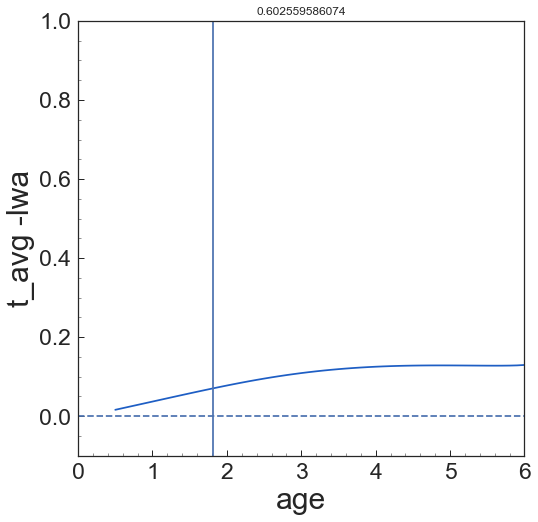

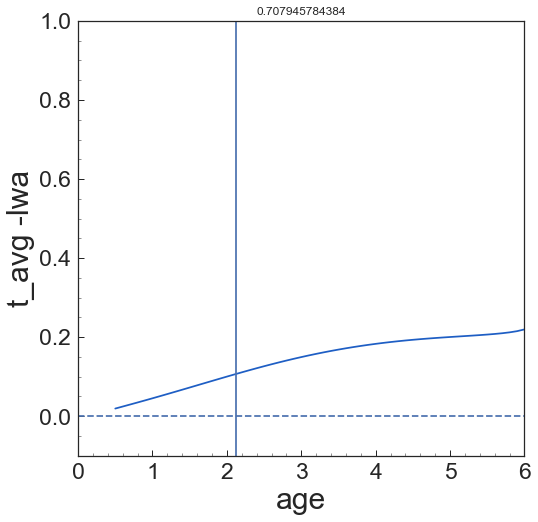

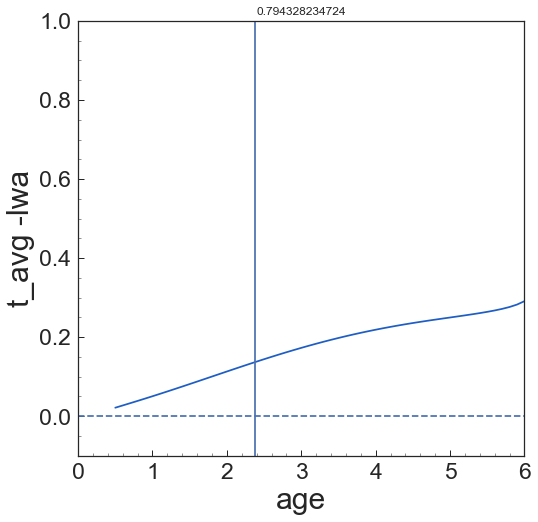

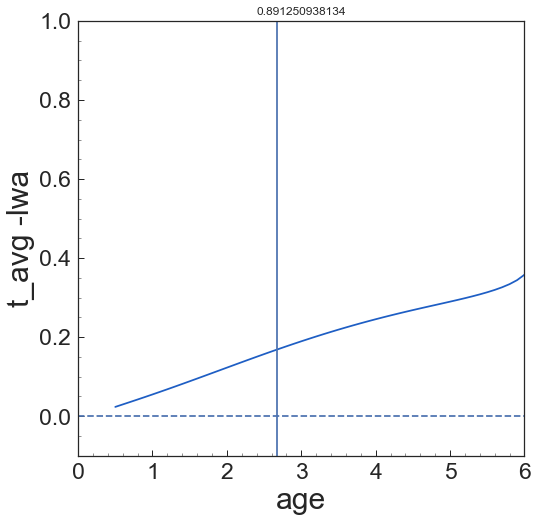

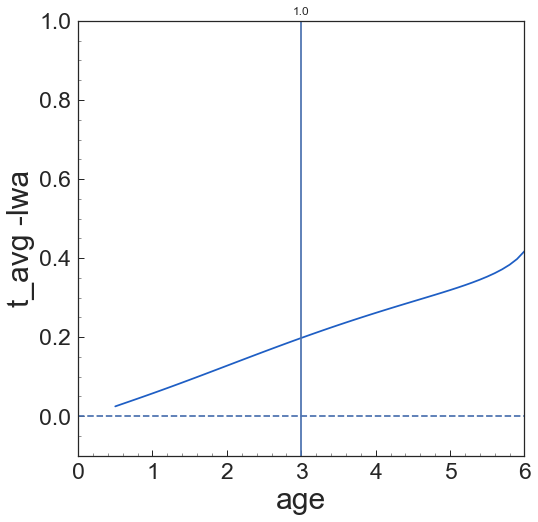

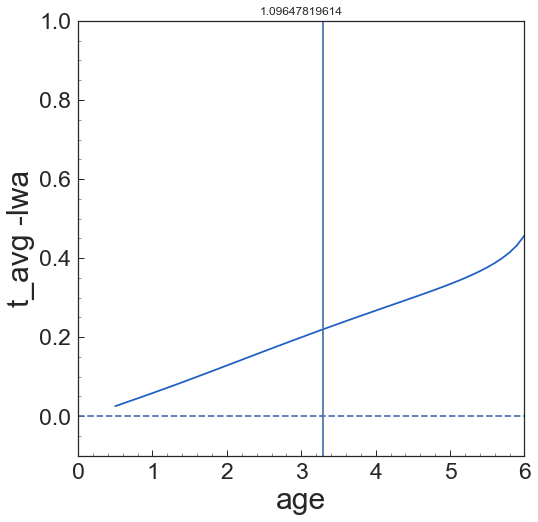

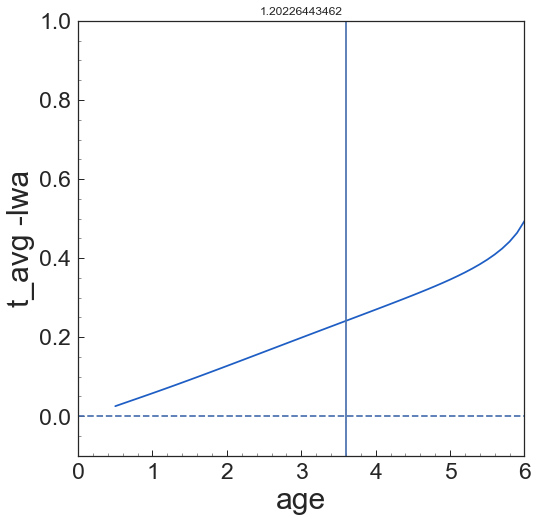

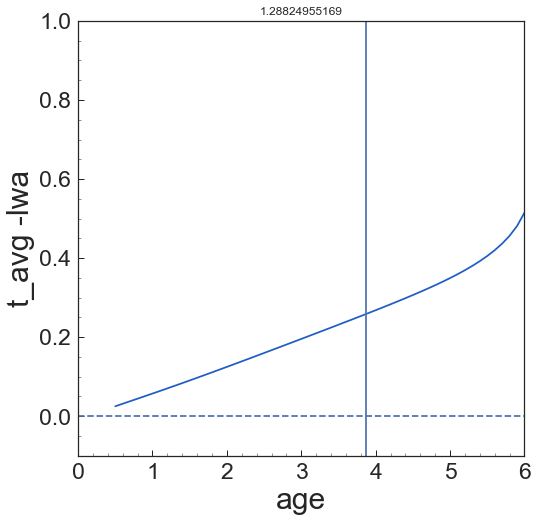

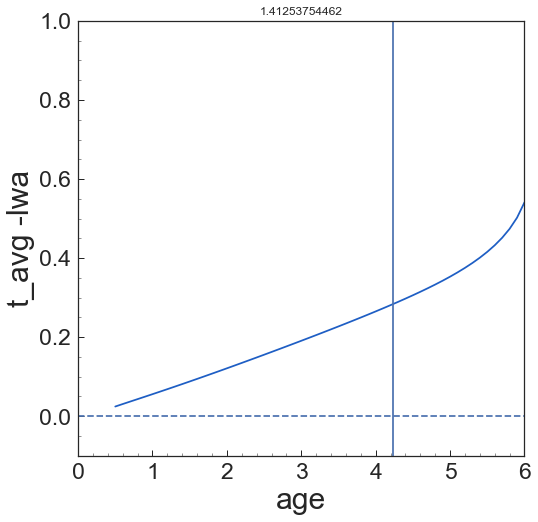

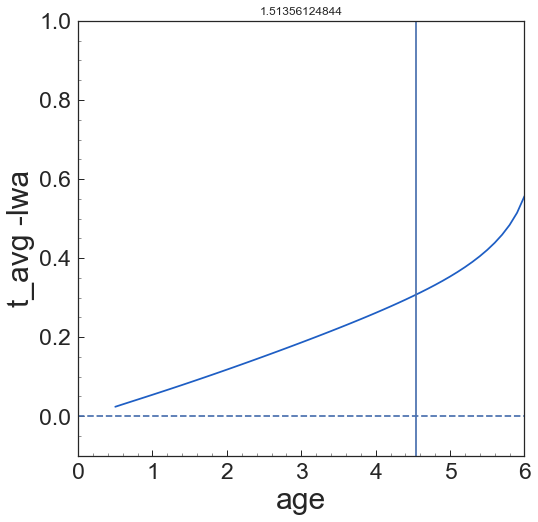

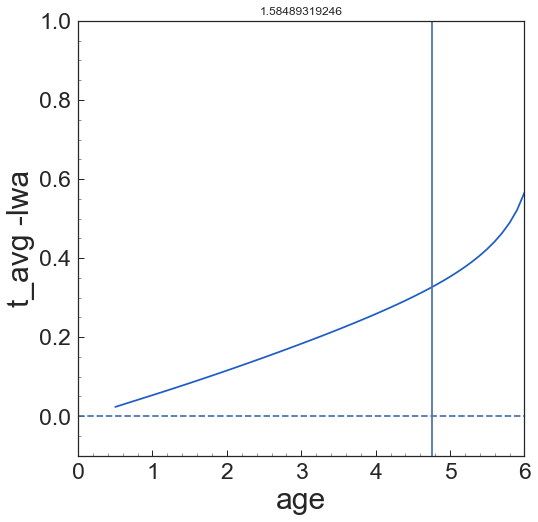

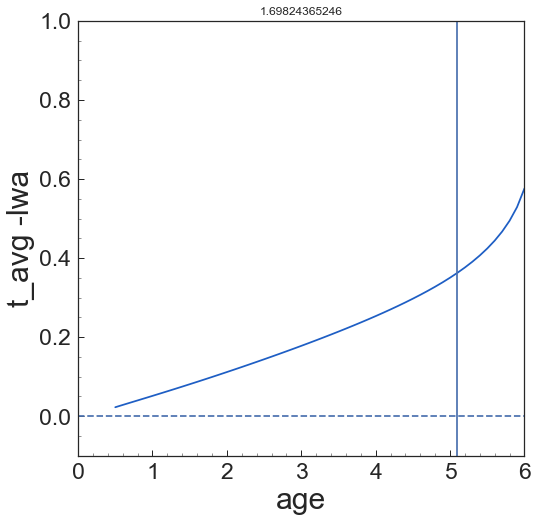

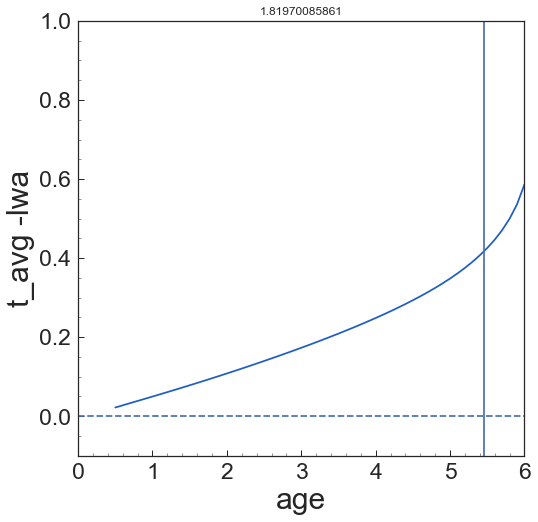

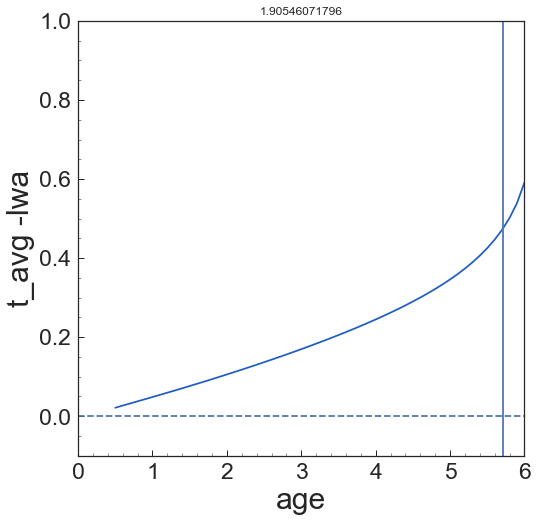

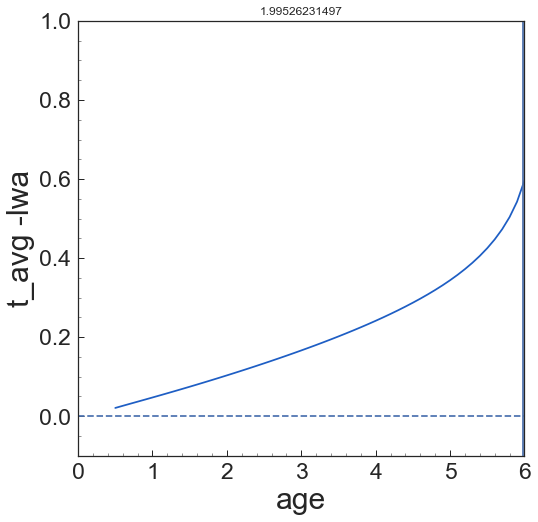

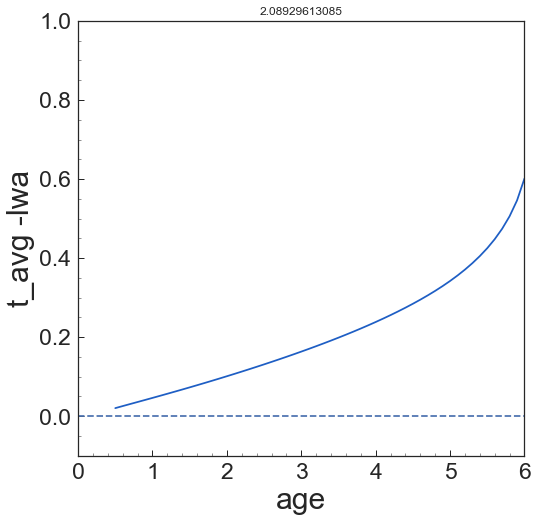

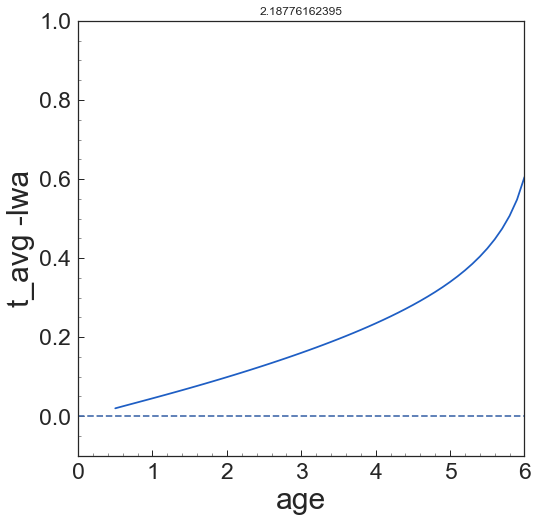

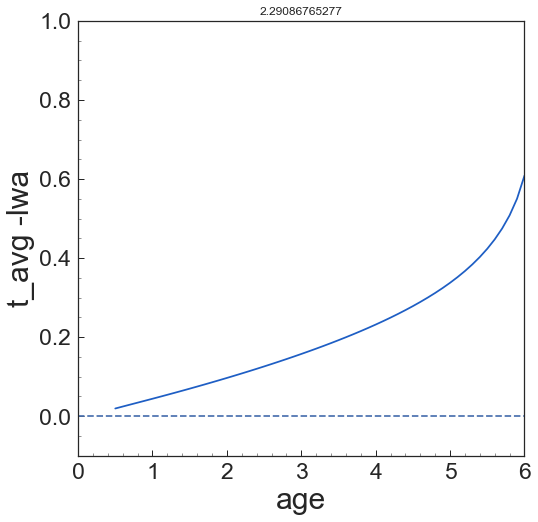

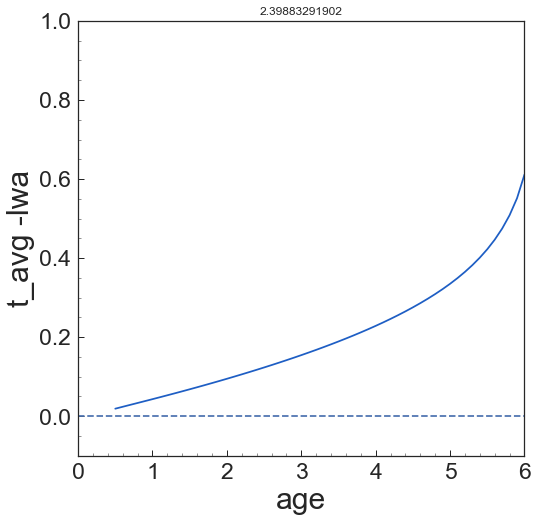

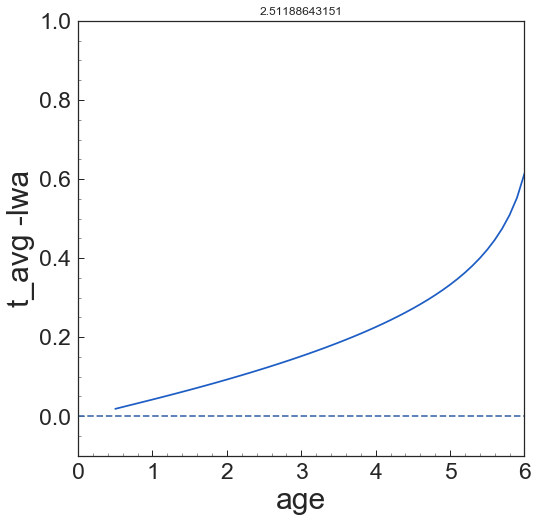

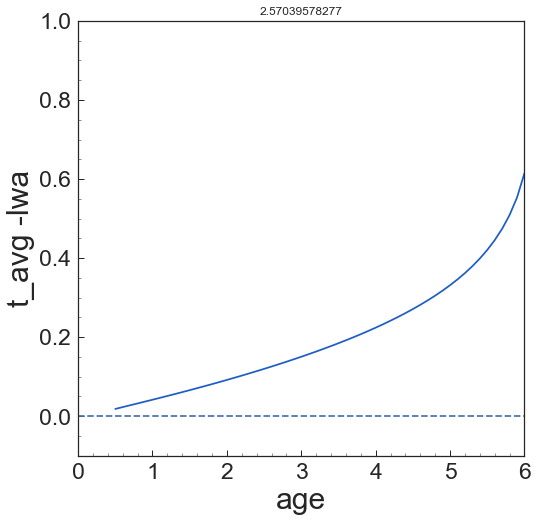

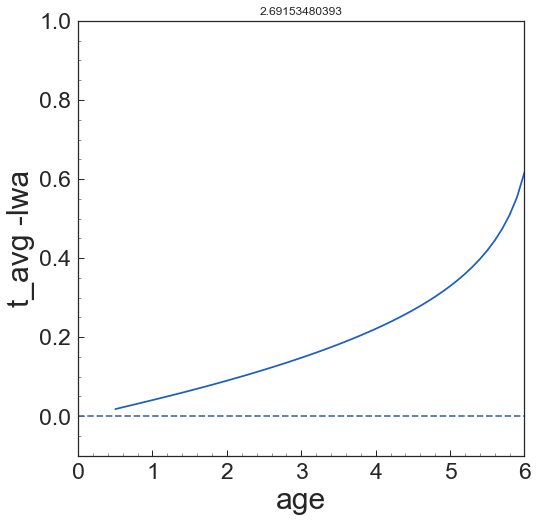

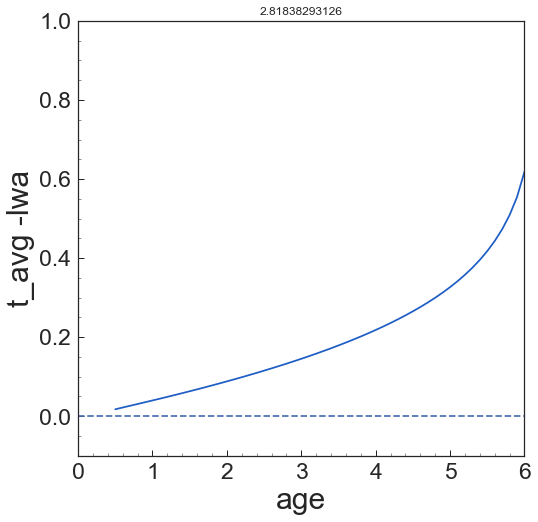

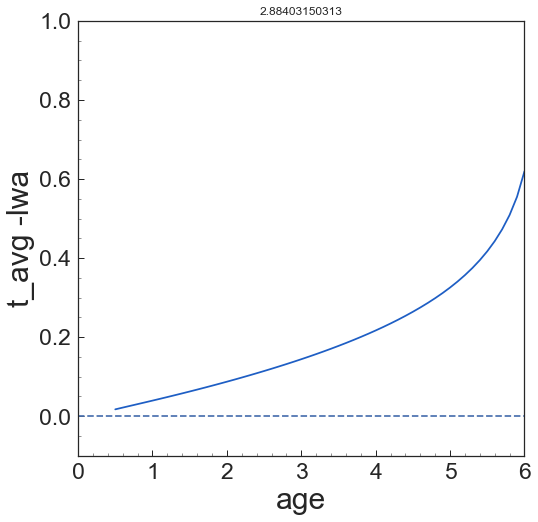

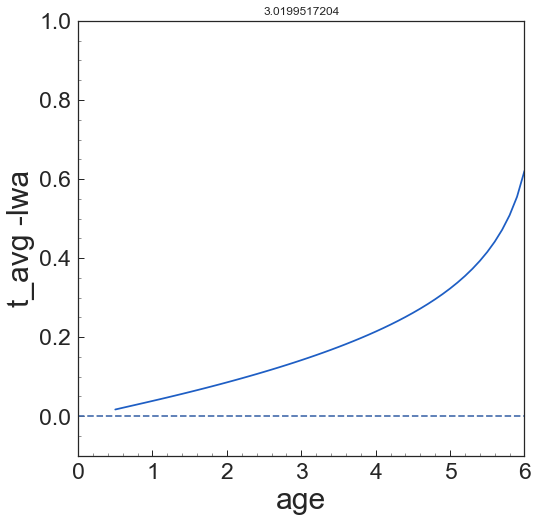

In [45]:
for i in range(len(tau)-1):
    plt.figure(figsize=[8,8])
    plt.axhline(0,linestyle='--')
    plt.plot(age,(t_avg(ultau[i+1])-ldist[i+1]) / ldist[i+1] ,color=col_list[1])
    plt.axvline(3*ultau[i+1])
    plt.ylabel('t_avg -lwa',fontsize=30)
    plt.xlabel('age',fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=23)
    plt.minorticks_on()
    plt.xlim(0,6)
    plt.ylim(-0.1,1)
    plt.title(ultau[i+1])


/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in divide


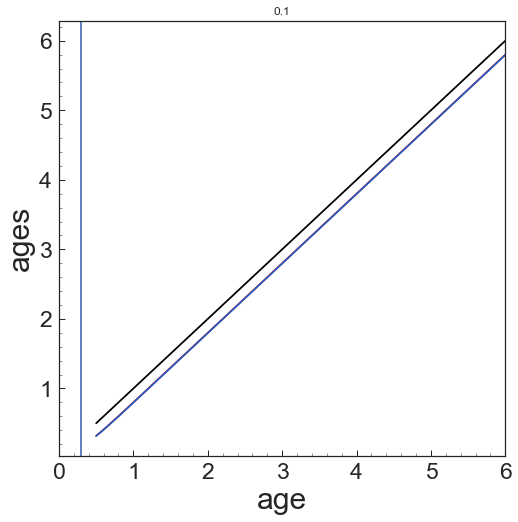

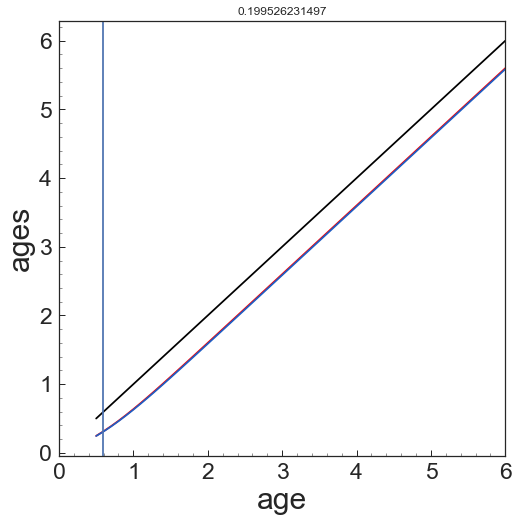

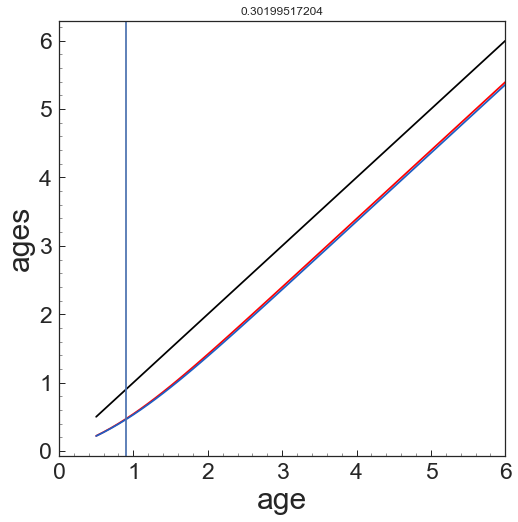

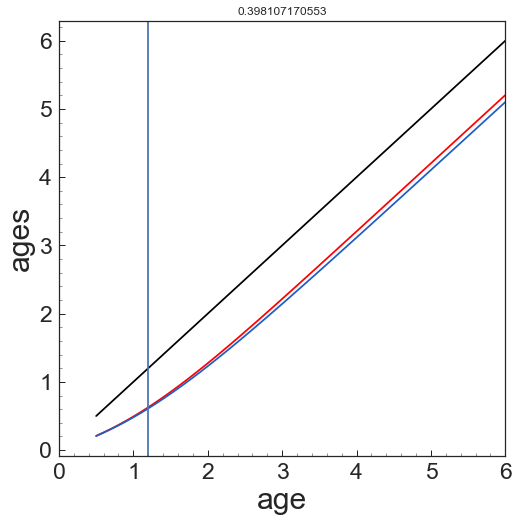

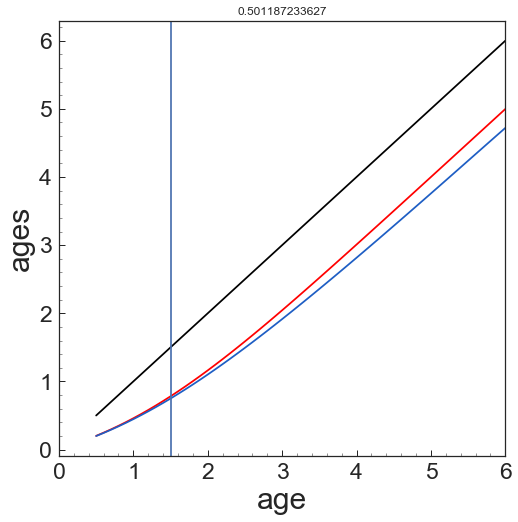

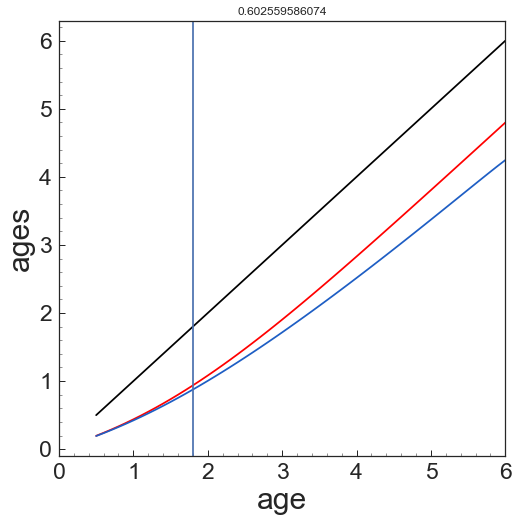

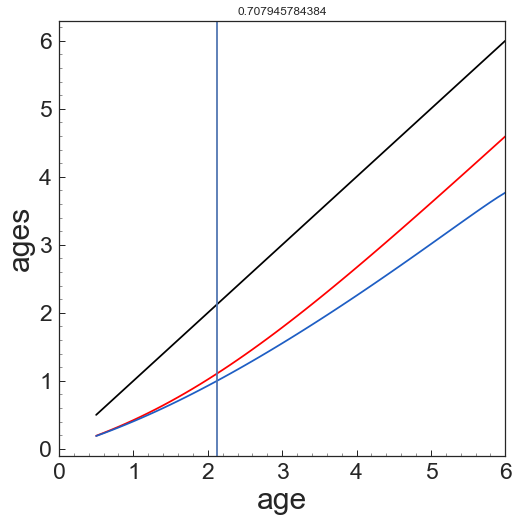

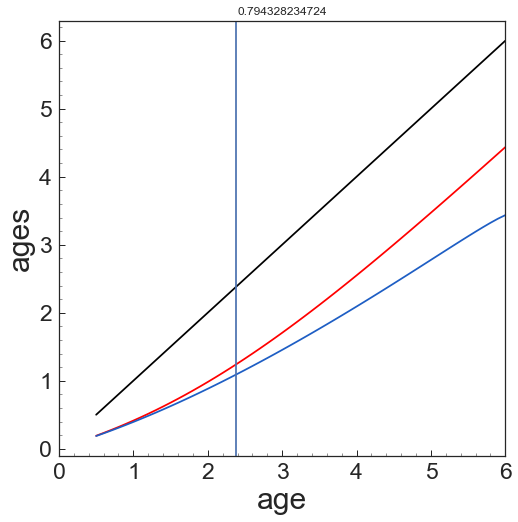

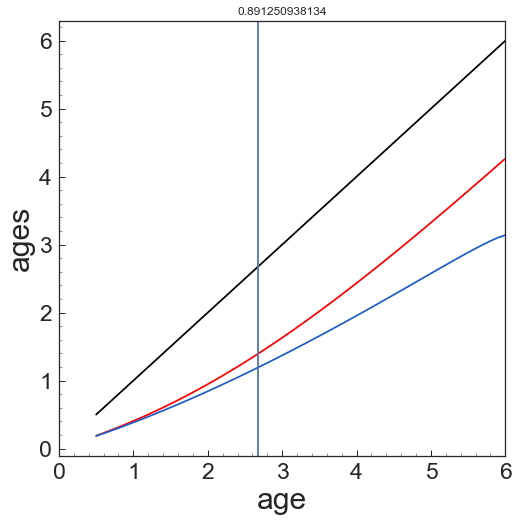

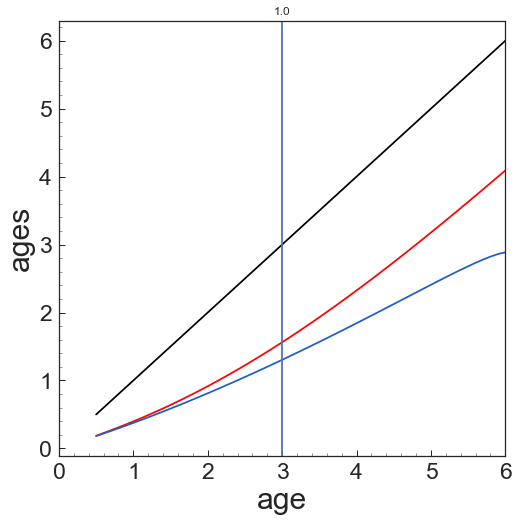

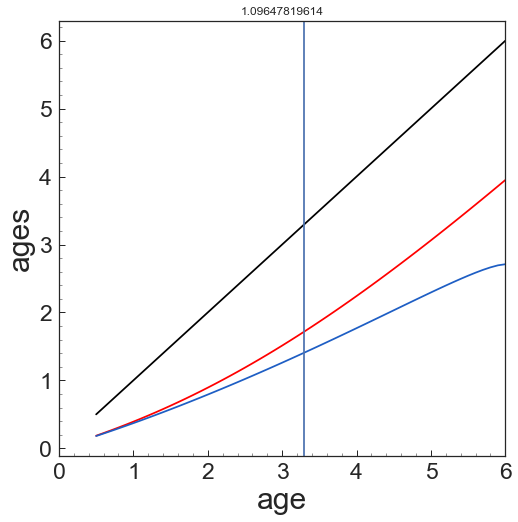

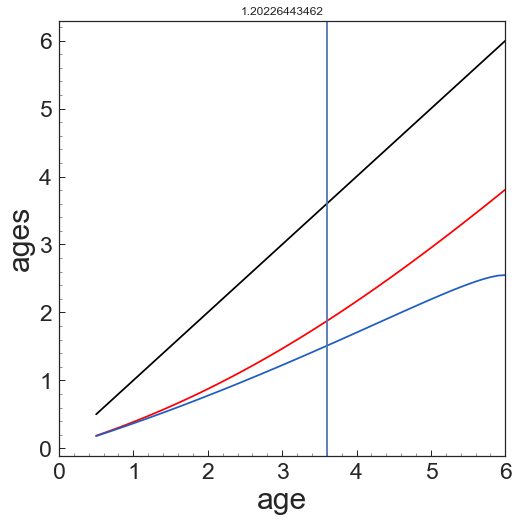

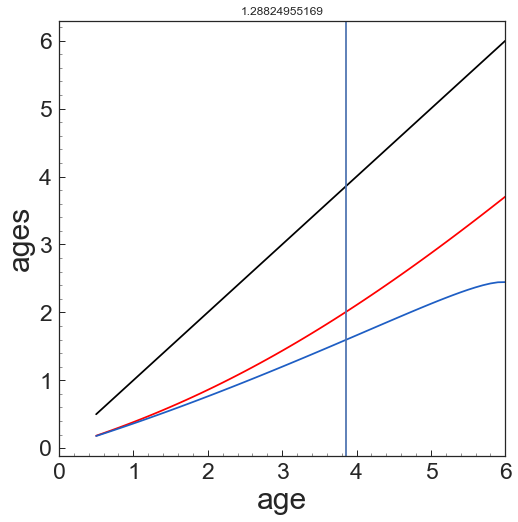

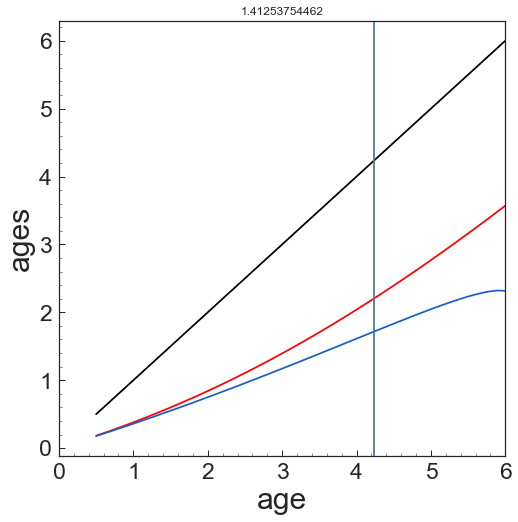

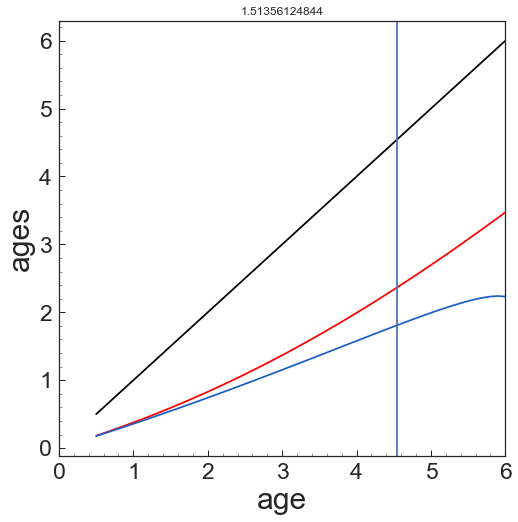

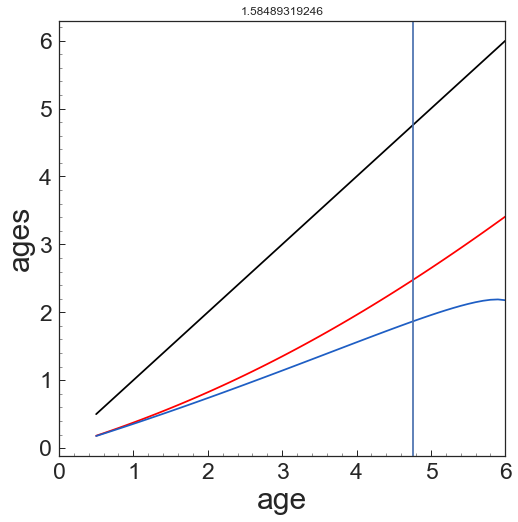

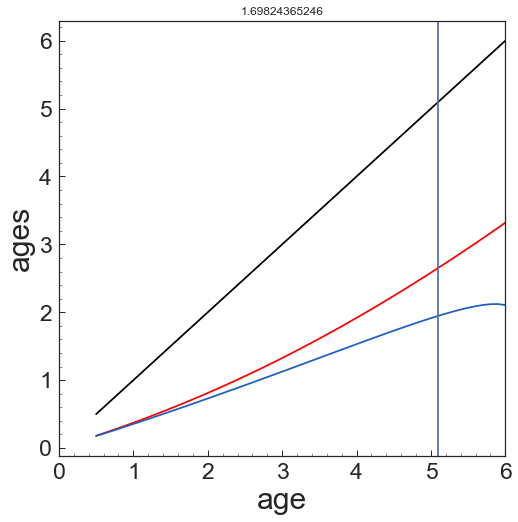

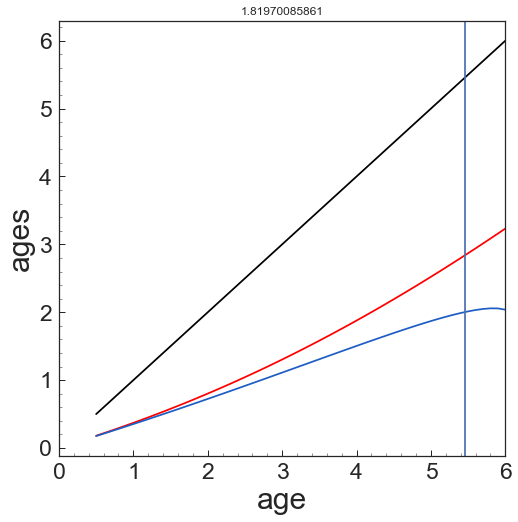

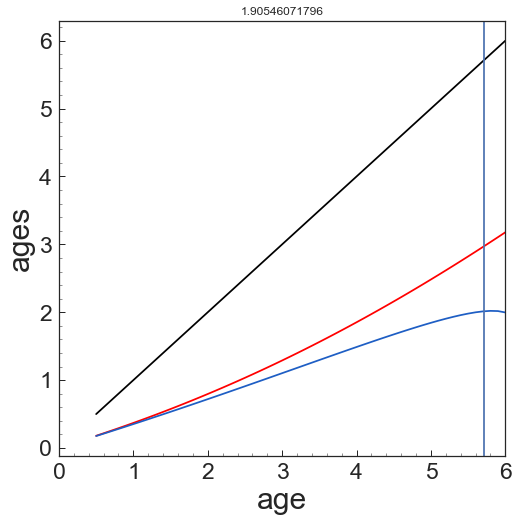

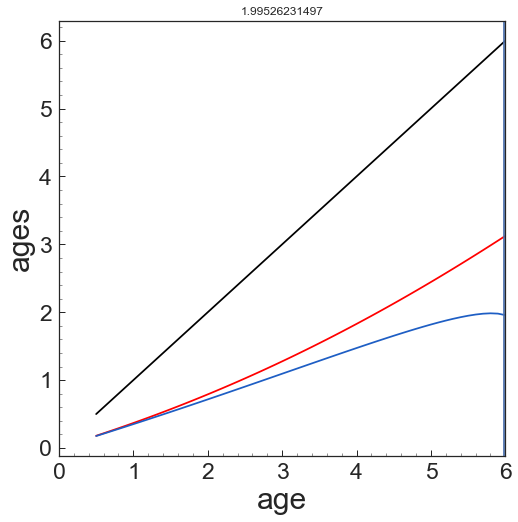

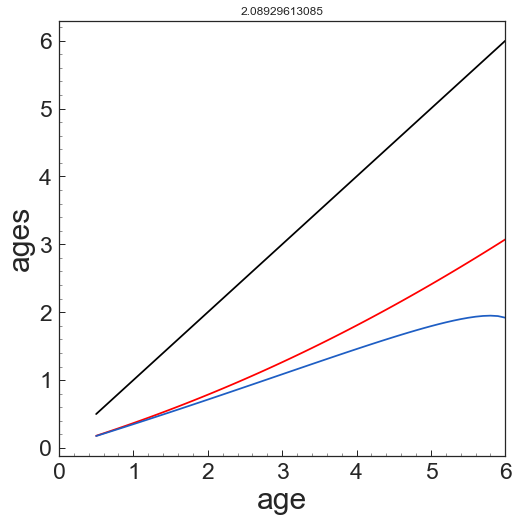

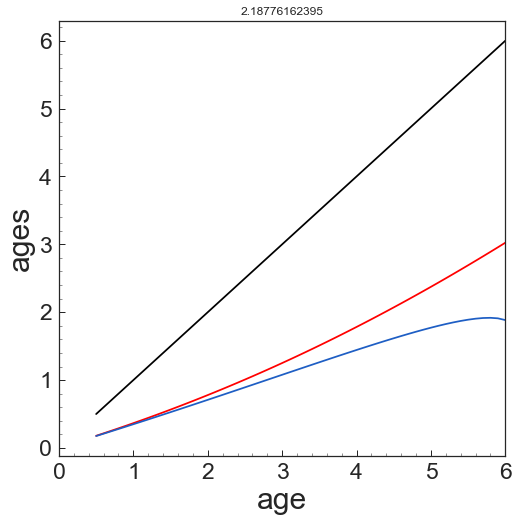

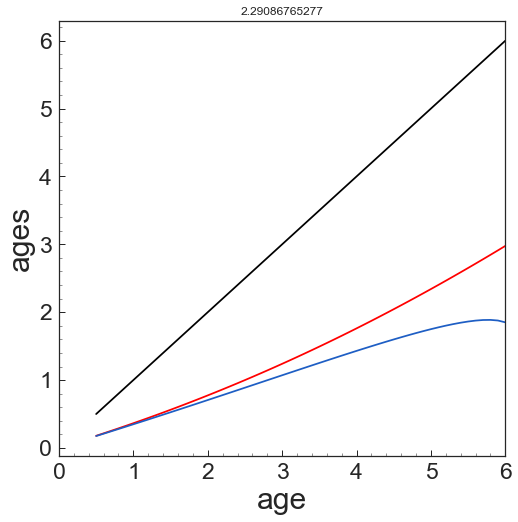

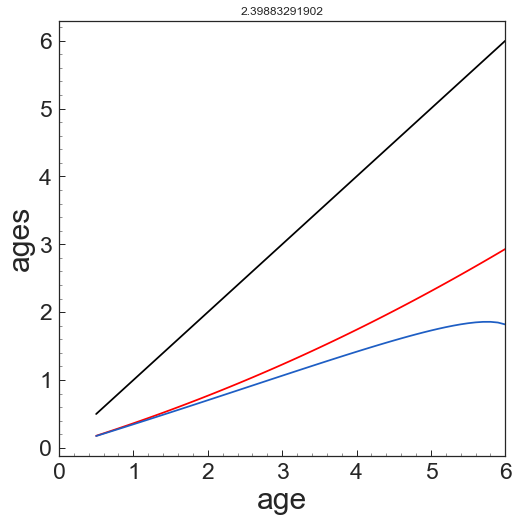

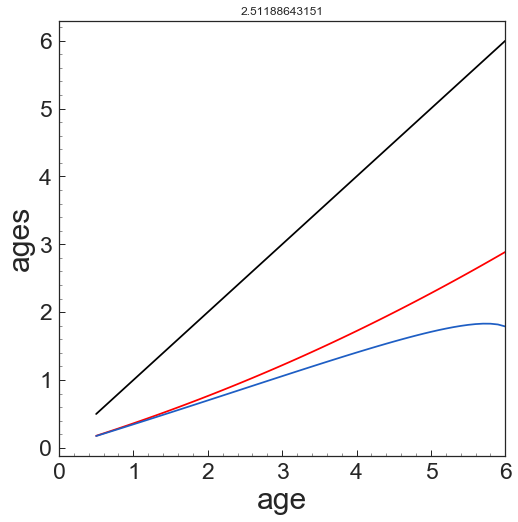

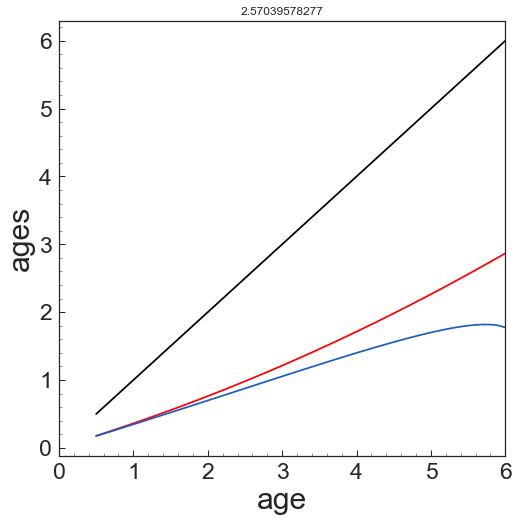

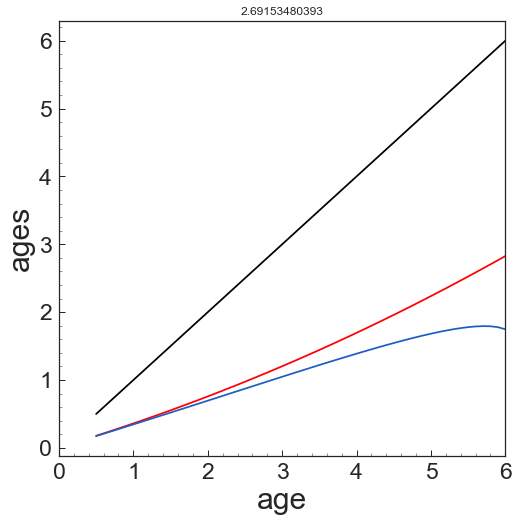

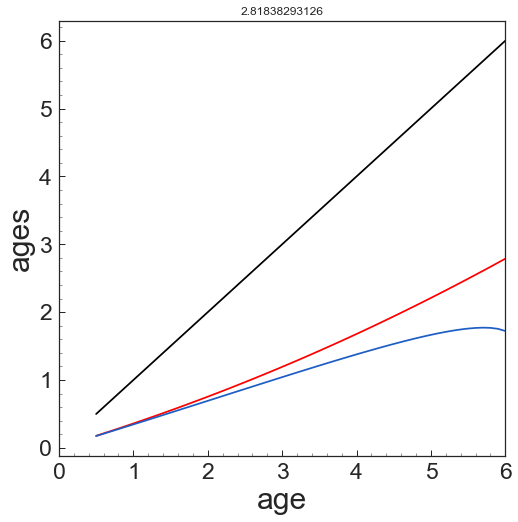

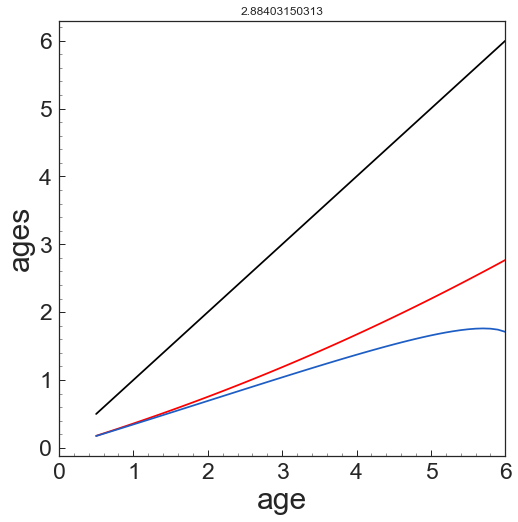

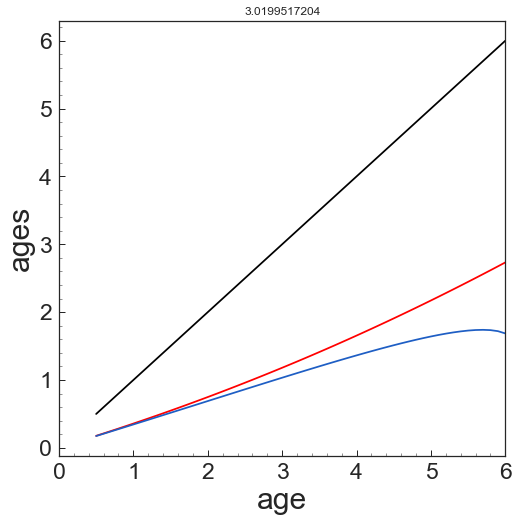

In [47]:
for i in range(len(tau)-1):
    plt.figure(figsize=[8,8])
    plt.plot(age,age,'k')
    plt.plot(age,t_avg(ultau[i+1]),'r')
    plt.plot(age,ldist[i+1],color=col_list[1])
    plt.axvline(3*ultau[i+1])
    plt.ylabel('ages',fontsize=30)
    plt.xlabel('age',fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=23)
    plt.minorticks_on()
    plt.xlim(0,6)
    plt.title(ultau[i+1])